<a href="https://colab.research.google.com/github/Juan2025-1/Clase-Ciencia-de-Datos-2025/blob/main/semana%2009/1%20trabajo%20del%202%20corte%202025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Primer trabajo del segundo corte de ciencia de Datos**

##**Introducción**
En este manual, se explorarán las funciones de tiempo y la jerarquía de fechas en Python. Estas herramientas son fundamentales para la manipulación y análisis de datos temporales, que son comunes en muchos campos como la ciencia de datos, análisis financiero, seguimiento de sensores y más.

###**¿Cual es la importancia de la gestión de fechas y tiempos en ciencia de datos?**

Las fechas y los tiempos son componentes esenciales de los datos en la ciencia de datos. La capacidad para gestionar y manipular estos datos correctamente permite realizar análisis temporales precisos, pronósticos, y tomar decisiones basadas en tendencias y patrones temporales.

####**Descripcion de la Funciones de Tiempo**
Las funciones de tiempo permiten trabajar con objetos de tipo fecha y hora en Python, facilitando la manipulación, extracción y conversión de datos temporales. Estas funciones son particularmente útiles en análisis de series temporales, en los que es necesario acceder a componentes específicos de las fechas, como el año, mes, día, etc.

**Las funciones de tiempo se aplican comúnmente en contextos como**:
- Análisis de series temporales (como precios de acciones, temperaturas, etc.)
- Análisis financiero (como pronósticos y estimaciones de ventas)
- Seguimiento de sensores o dispositivos conectados.



In [49]:
# Importación de pandas y creación de un rango de fechas
import pandas as pd

# Crear un rango de fechas
fechas = pd.date_range(start='2023-01-01', periods=10, freq='D')

# Extraer elementos (año, mes, día, día de la semana)
df = pd.DataFrame({'fechas': fechas})
df['día_semana'] = df['fechas'].dt.day_name()
df

,fechas,día_semana
0,2023-01-01,Sunday
1,2023-01-02,Monday
2,2023-01-03,Tuesday
3,2023-01-04,Wednesday
4,2023-01-05,Thursday
5,2023-01-06,Friday
6,2023-01-07,Saturday
7,2023-01-08,Sunday
8,2023-01-09,Monday
9,2023-01-10,Tuesday


###**1. Para calcular cuántos días han pasado desde una fecha determinada:**

Ahora si queremos calcular cuántos días han pasado desde una fecha determinada. Usaremos, por ejemplo, la fecha '2023-01-05' como fecha de referencia.

In [53]:
fecha_determinada = pd.Timestamp('2023-01-05')
df['días_desde'] = (df['fechas'] - fecha_determinada).dt.days
df

,fechas,día_semana,días_desde
0,2023-01-01,Sunday,-4
1,2023-01-02,Monday,-3
2,2023-01-03,Tuesday,-2
3,2023-01-04,Wednesday,-1
4,2023-01-05,Thursday,0
5,2023-01-06,Friday,1
6,2023-01-07,Saturday,2
7,2023-01-08,Sunday,3
8,2023-01-09,Monday,4
9,2023-01-10,Tuesday,5


##**Explicacion de formula de codigo:**
**1.Definir una fecha determinada**

image.png

se crea un objeto de tipo Timestamp con la fecha '2023-01-05' utilizando pd.Timestamp() de Pandas. Esto permite manejar la fecha como un tipo de dato especial en Pandas, que puede ser utilizado en operaciones con otras fechas.

**2. Restar las fechas del DataFrame con la fecha determinada**

image.png

- df['fechas'] hace referencia a la columna 'fechas' dentro del DataFrame df, que debe contener fechas.

- Se realiza una operación de resta entre la columna 'fechas' y la variable fecha_determinada.

El resultado de esta operación es un objeto Timedelta que contiene la diferencia de tiempo entre cada fecha en 'fechas' y la fecha '2023-01-05'. La diferencia puede ser expresada en días, segundos, horas, etc.

**3.Convertir la diferencia a días**

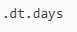

usamos .dt.days, que es una propiedad de Pandas utilizada para acceder a los componentes de tiempo de un Timedelta. En este caso, .dt.days extrae el número de días completos de la diferencia calculada previamente.

**4.Asignar el resultado a una nueva columna**

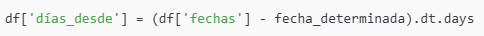

La expresión completa se asigna a una nueva columna llamada 'días_desde' en el DataFrame df. Esta columna contendrá el número de días transcurridos entre cada fecha en 'fechas' y la fecha '2023-01-05'.

**5.Resultado final**

image.png

Finalmente, al ejecutar df, el DataFrame ahora tendrá una nueva columna llamada 'días_desde' que contiene el número de días transcurridos desde '2023-01-05' hasta cada fecha en la columna 'fechas'.

###**2.Filtrar los datos por fechas**

Si quieres filtrar los datos para obtener solo las filas que tienen una fecha específica en la columna 'fechas', puedes hacer lo siguiente:

In [54]:
import pandas as pd

fechas = pd.date_range(start='2023-01-01', periods=10, freq='D')

df = pd.DataFrame({'fechas': fechas})
df['día_semana'] = df['fechas'].dt.day_name()

# Filtrar por una fecha específica (por ejemplo, '2023-01-05')
fecha_especifica = pd.Timestamp('2023-01-05')
df_filtrado = df[df['fechas'] == fecha_especifica]

# Mostrar el DataFrame filtrado
df_filtrado


,fechas,día_semana
4,2023-01-05,Thursday


Hay muchas formas de calcular un filtro de datos por fechas en este caso lo hicimos por un filtro de fechas especifico, ya que nos permitira tener un resultado mas exacto.

#**Descripcion de la funcion de jerarquia de fechas:**
La jerarquía de fechas es un concepto que implica organizar y agrupar los datos temporales según diferentes componentes, como el año, mes, trimestre, semana, etc. Este tipo de agrupación es útil para realizar resúmenes, análisis de tendencias y visualización de datos.
###**Aplicabilidad:**
La jerarquía de fechas es fundamental en escenarios como:
- Creación de dashboards interactivos.
- Generación de reportes mensuales o anuales.
- Pronósticos de tendencias a partir de datos históricos.



##**Ejemplo de actividad caso practico 2:**

**1.Agrupar un dataset por trimestre y calcula estadísticas descriptivas**

Para agrupar los datos por trimestre, usamos el atributo .dt.to_period('Q') que convierte las fechas en trimestres. Luego, podemos calcular las estadísticas descriptivas como la media, la desviación estándar, el mínimo, el máximo, etc.

In [55]:
import numpy as np

# Crear un DataFrame con ventas diarias
df = pd.DataFrame({
    'fecha': pd.date_range(start='2023-01-01', periods=90, freq='D'),
    'ventas': np.random.randint(100, 1000, size=90)
})

# Agrupar por mes
df['mes'] = df['fecha'].dt.to_period('M')
ventas_mensuales = df.groupby('mes')['ventas'].sum()

ventas_mensuales

,ventas
mes,
2023-01,15147
2023-02,13032
2023-03,16939


###**Explicacion de codigos:**

**1. Importancia de librerias**
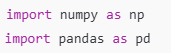

- numpy: Se utiliza para manejar operaciones numéricas. En este caso, se usará para generar valores aleatorios de ventas.

- pandas: Es una librería poderosa para manejar y analizar datos, especialmente con estructuras como DataFrames.

**2. Creacion de Dataframe**

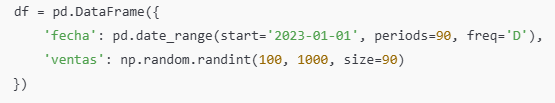

- fecha: Usamos pd.date_range() para generar 90 fechas consecutivas, comenzando desde el 1 de enero de 2023. El parámetro freq='D' asegura que las fechas sean diarias.

- ventas: Usamos np.random.randint(100, 1000, size=90) para generar 90 números aleatorios entre 100 y 1000. Estos números representan las ventas diarias, y los asignamos a la columna "ventas".

Al final, este paso crea un DataFrame que tiene 90 filas, cada una representando un día y su respectiva cantidad de ventas.

**3. Agrupar por mes**

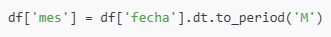

Aquí estamos creando una nueva columna llamada mes que contiene el mes correspondiente a cada fecha. Para hacerlo, usamos el atributo .dt de pandas, que nos permite acceder a funcionalidades de fechas, y luego usamos el método .to_period('M'), que convierte la fecha en un periodo mensual (es decir, el año y mes, sin considerar los días específicos).

Por ejemplo, si la fecha es "2023-01-15", la columna "mes" será "2023-01".

**4. Sumar ventas por mes**

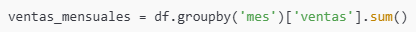

Aquí estamos agrupando el DataFrame por la columna mes (que ya contiene los meses). Luego, usamos .groupby('mes') para agrupar todas las filas que tienen el mismo valor en la columna "mes". Después, seleccionamos la columna ventas para aplicar la operación de suma con .sum(). Esto nos dará el total de ventas para cada mes.

El resultado es una serie con el total de ventas de cada mes.

In [56]:
# Agrupar por trimestre
df['trimestre'] = df['fecha'].dt.to_period('Q')
ventas_trimestrales = df.groupby('trimestre')['ventas'].agg(['mean', 'sum', 'max', 'min'])

ventas_trimestrales

,mean,sum,max,min
trimestre,,,,
2023Q1,501.311111,45118,984,106


##**Explicacion de codigos:**
**1. Agrupar por trimestre**

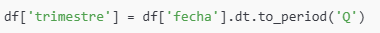

En esta línea, estamos creando una nueva columna llamada trimestre. Vamos a explicar cómo funciona:

- df['fecha']: Esta es la columna de fechas que tenemos en el DataFrame.

- .dt.to_period('Q'): Este es un método de pandas que convierte las fechas en periodos trimestrales. El parámetro 'Q' indica que queremos el periodo a nivel de trimestres.

- Un trimestre es un periodo de tres meses, por lo que si tenemos una fecha como "2023-01-15", el trimestre correspondiente sería "2023Q1" (es decir, el primer trimestre de 2023: enero, febrero, marzo).

- Si la fecha es "2023-07-10", el trimestre correspondiente será "2023Q3" (el tercer trimestre: julio, agosto, septiembre).

Esto significa que ahora cada fila tendrá un trimestre asignado dependiendo de la fecha. Por ejemplo, si la fecha es "2023-03-15", el valor en la columna "trimestre" será "2023Q1".



**2. Agrupar y aplicar funciones agregadas**

image.png

Aquí estamos agrupando el DataFrame por trimestre y calculando diferentes estadísticas de las ventas para cada trimestre. Vamos a desglosarlo:

- df.groupby('trimestre'): Agrupa el DataFrame por la columna trimestre que acabamos de crear. Es decir, todos los datos que corresponden al mismo trimestre (como "2023Q1", "2023Q2", etc.) se agrupan juntos.

- ['ventas']: Después de agrupar por trimestre, seleccionamos la columna ventas, ya que estamos interesados en calcular estadísticas sobre esta columna.

- .agg(['mean', 'sum', 'max', 'min']): Aquí usamos el método agg() para aplicar varias funciones agregadas a la columna de ventas. Las funciones que estamos usando son:

  - **mean:** Calcula el promedio de las ventas en ese trimestre.

  - **sum:** Calcula la suma total de las ventas en ese trimestre.

  - **max:** Obtiene el valor máximo de ventas en ese trimestre (el día con las ventas más altas).

  - **min:** Obtiene el valor mínimo de ventas en ese trimestre (el día con las ventas más bajas).

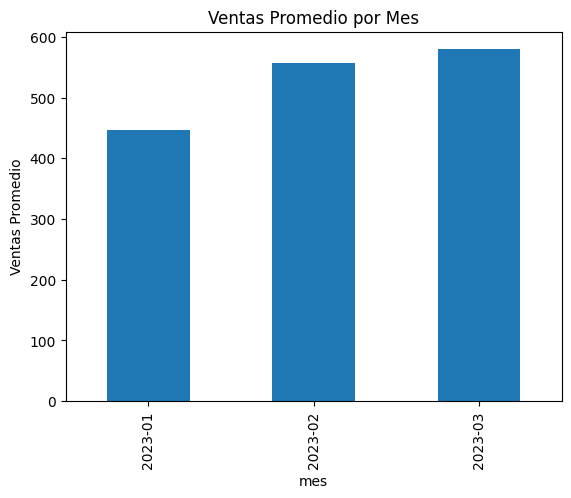

In [57]:
import numpy as np
df = pd.DataFrame({
    'fecha': pd.date_range(start='2023-01-01', periods=90, freq='D'),
    'ventas': np.random.randint(100, 1000, size=90)
})

df['mes'] = df['fecha'].dt.to_period('M')
ventas_mensuales = df.groupby('mes')['ventas'].sum()
import matplotlib.pyplot as plt

# Agrupar por mes
ventas_mensuales = df.groupby('mes')['ventas'].mean()

# Visualizar
ventas_mensuales.plot(kind='bar', title='Ventas Promedio por Mes')
plt.ylabel('Ventas Promedio')
plt.show()

##**Explicacion de codigos:**
**1. Importación de la librería matplotlib**

image.png

Aquí importamos matplotlib.pyplot, que es una librería muy popular para crear gráficos en Python. El alias plt se usa comúnmente para hacer más cómodo su uso.

**2. Agrupar por mes y calcular el promedio de ventas**

image.png

Este paso se refiere a lo siguiente:

- df.groupby('mes'): Agrupamos el DataFrame df por la columna mes. Es decir, los datos serán agrupados por el mes en que ocurrieron las ventas.

- ['ventas']: Después de agrupar por mes, seleccionamos la columna ventas.

- .mean(): Calculamos el promedio de las ventas para cada mes. Esto nos dará el valor promedio de las ventas diarias en cada mes.

Al final, ventas_mensuales será una serie que contiene el promedio de las ventas para cada mes.


**3. Visualización de los datos**

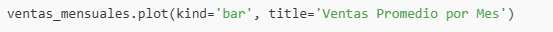

En esta línea, estamos usando el método plot() de pandas para crear una visualización de los datos. Aquí están los parámetros importantes:

- kind='bar': Especificamos que queremos un gráfico de barras. Esto es útil para visualizar comparaciones entre los promedios de ventas de cada mes.

- title='Ventas Promedio por Mes': Establecemos el título del gráfico como "Ventas Promedio por Mes".

**4. Etiquetas y mostrar el gráfico**

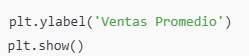

- plt.ylabel('Ventas Promedio'): Establecemos la etiqueta del eje Y (el eje vertical), que representa las ventas promedio.

- plt.show(): Este comando muestra el gráfico en pantalla. Es necesario para que el gráfico sea renderizado y visualizado.



#**¿Que aprendimos en este manual Instructivo?**
Lo que apredi en la construccion de este manual fue a cómo trabajar con fechas y tiempos en Python usando Pandas. Vimos cómo crear rangos de fechas, extraer componentes de fechas, y agrupar datos por diferentes niveles de jerarquía temporal.
##**¿En qué escenarios reales se aplicaría lo aprendido?**


**1. Análisis de Ventas: Agrupar ventas por mes o trimestre**
La manipulación de fechas es crucial cuando se realiza un análisis de ventas en diferentes intervalos de tiempo. Algunas de las aplicaciones clave incluyen:

- Análisis mensual o trimestral de ventas: A menudo, las empresas necesitan analizar las ventas en intervalos específicos, como mensual o trimestral, para evaluar el rendimiento de sus productos y servicios. Agrupar los datos por mes o trimestre ayuda a identificar tendencias estacionales, fluctuaciones en la demanda y comportamientos a lo largo del tiempo.
- Informes financieros: Las empresas deben generar reportes financieros periódicos, como balances mensuales o trimestrales, para evaluar su rentabilidad y tomar decisiones estratégicas basadas en estos resultados.
- Proyecciones de ventas: Usar datos históricos de ventas organizados por mes o trimestre puede ayudar a predecir ventas futuras, lo cual es crucial para la planificación de inventarios, estrategias de marketing, y otras decisiones operativas.
##**¿Qué dificultades encontraste y cómo las resolviste?**

Se me presentaron muchos problemas en la elaboracion de este manual, como el formato de codigos para ingresar fechas y tiempos, a veces se pueden presentar problemas como formatos de fecha incorrectos o inconsistencias en los datos. Por otro lado, se me dificulto mucho entender algunos codigos por esta razon consulte por medios wed para entender un poco mas su funcion. Sin embargo en el desarrollo de este Manual fui compendiendo mucho mas las funciones de los codigos.